In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8788
Name: area_type, dtype: int64

In [5]:
df2= df1.drop(['area_type','availability','society', 'balcony', 'availability'], axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()


location       3
size          18
total_sqft     2
bath          75
price          2
dtype: int64

In [7]:
import math
medianbath=math.floor(df2.bath.median())
medianbath


2

In [8]:
df2.bath.fillna(medianbath)

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13244, 5)

In [12]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ANUJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df4 = df3.drop(columns="size")

In [17]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [18]:
df3[df3['bhk']>4]

,location,size,total_sqft,bath,price,bhk
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.0,6
45,HSR Layout,8 Bedroom,600,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6
64,Bommanahalli,8 Bedroom,3000,8.0,140.0,8
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8
...,...,...,...,...,...,...
13281,Margondanahalli,5 Bedroom,1375,5.0,125.0,5
13300,Hosakerehalli,5 Bedroom,1500,6.0,145.0,5
13303,Vidyaranyapura,5 Bedroom,774,5.0,70.0,5
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.0,7


In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def convert_sqft_to_float(x):
    tokens= x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
convert_sqft_to_float('1150')

1150.0

In [23]:
convert_sqft_to_float('1133 - 1384')

1258.5

In [24]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_float)

In [25]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [27]:
import math
mediansqft=math.floor(df4['total_sqft'].median())

In [28]:
mediansqft

1275

In [29]:
df4=df4.fillna(mediansqft)

In [30]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [31]:
df4['total_sqft'].unique()


array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [32]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [33]:
df4.head() #End of data cleaning part

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# FEATURE ENGINEERING PART

In [34]:
df5= df4.copy()

In [35]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [36]:
#In real estate market, price per sqft is very important

df5['price_per_sqft']=df5['price'] * 100000 /df5['total_sqft']  

#the price is given in lakh rupees.

In [37]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
len(df5.location.unique())

1304

In [39]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats =  df5.groupby('location')['location'].agg('count')  #to count the number of data points of each location
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [40]:
location_stats.sort_values(ascending=False)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [41]:
len(location_stats<=10)

1293

In [42]:
len(location_stats[location_stats<=10])

1052

In [43]:
count=0
for i in location_stats:
    if(i<=10):
            count= count+1
      
    
count

1052

In [44]:
location_stats_less_than_10 =location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [45]:
len(df5.location.unique())

1293

In [46]:
df5.location= df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [47]:
len(df5.location.unique())

242

# Outlier Detection

In [48]:
#typical theshold of a bedroom is 300 sqft and these outliers have to be removed

In [49]:
df6  = df5[~((df5.total_sqft/df5.bhk)<300)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [50]:
df5.shape 

(13244, 7)

In [51]:
 df6.shape     #after outlier detection

(12492, 7)

In [52]:
df6.price_per_sqft.describe()

count     12492.000000
mean       6318.243294
std        4181.108318
min         267.829813
25%        4210.280144
50%        5295.073227
75%        6933.333333
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
#In the above output, I have neglected the extreme cases like "max" price and "min" , because in Bangalore,it is highly unlikely to buy a house at a price_per_sqft of INR 267.82.
#Also when building a generic ML model, the "max" price_per_sqft can be neglected even though there are exceptions of costly plots(such as in posh localities).

In [54]:
#Lets plot a histogram for price per sqft feature

Text(0, 0.5, 'Frequency')

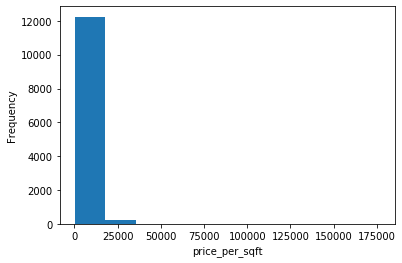

In [55]:
plt.hist(df6['price_per_sqft'])
plt.xlabel('price_per_sqft')
plt.ylabel('Frequency')

In [56]:
#The above cure follows a normal distribution, so we can conclude that the standard deviation can considered as a threshold for prediction.
#We need to discard values of 'price_per_sqft' that are beyond its standard deviation.

In [57]:
def remove_pps_outliers(df):
    final_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
         upper_limit = subdf['price_per_sqft'].mean() + 1*subdf['price_per_sqft'].std()
         lower_limit = subdf['price_per_sqft'].mean() - 1*subdf['price_per_sqft'].std()
         subdf_without_outliers = subdf[(subdf['price_per_sqft'] >= lower_limit) & (subdf['price_per_sqft'] <= upper_limit)]
         final_df = pd.concat([final_df , subdf_without_outliers], ignore_index = True)
    return final_df

df7 = remove_pps_outliers(df6)
df7.shape

(10336, 7)

In [58]:
#now number of outliers removed
df6.shape[0]-df7.shape[0]

2156

In [59]:
df7.shape

(10336, 7)

In [60]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [61]:
#removing another set of outliers - if the number of bathrooms('bath') is greater than bedrooms + 2 
df8 = df7[df7['bath']<(df7['bhk']+2)]

In [62]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10331,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10332,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10333,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10334,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [63]:
#here again I have removed 95 outliers
df7.shape[0]- df8.shape[0]

95

In [64]:
def plot_scatter_total_sqft_and_price(df,location):
        bhk2 = df[(df.location==location) & (df.bhk==2)]
        bhk3 = df[(df.location==location) & (df.bhk==3)]
        plt.scatter(bhk2.total_sqft, bhk2.price, color ='red', label='2BHK')
        plt.scatter(bhk3.total_sqft, bhk3.price, color='green',  marker = "+", label = '3BHK')
        plt.xlabel("total_sqft")
        plt.ylabel("price")
        plt.title(location)
        plt.legend()

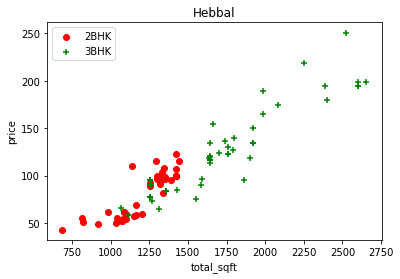

In [65]:
plot_scatter_total_sqft_and_price(df8,"Hebbal")
#here two red data points(1bhk houses) are of a higher price than the green data points(2 bhk houses), so these outliers have to be removed
#one way to remove such outliers is to find mean of 2 bhks, then discard the 3bhks that are at a value lesser than the mean of the 1bhks.

In [66]:
def plot_scatter_total_sqft_and_price(df,location):
        bhk2 = df[(df.location==location) & (df.bhk==2)]
        bhk3 = df[(df.location==location) & (df.bhk==3)]
        plt.scatter(bhk2.total_sqft, bhk2.price, color ='red', label='2BHK')
        plt.scatter(bhk3.total_sqft, bhk3.price, color='green',  marker = "+", label = '3BHK')
        plt.xlabel("total_sqft")
        plt.ylabel("price")
        plt.title(location)
        plt.legend()

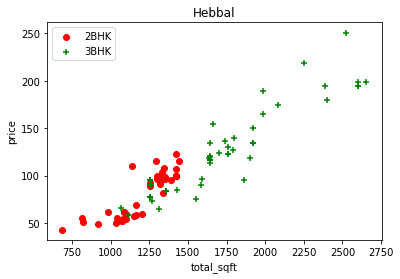

In [67]:
plot_scatter_total_sqft_and_price(df8,"Hebbal")


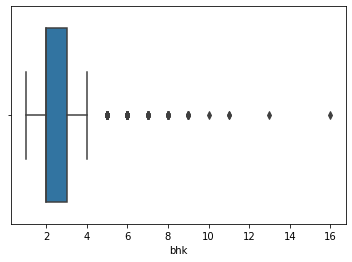

In [68]:
sns.boxplot(df8["bhk"])

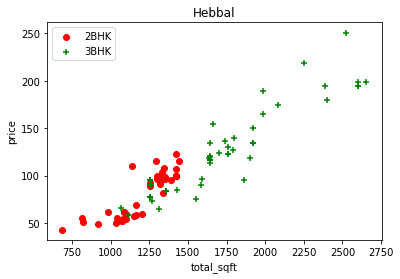

In [69]:
def plot_scatter_total_sqft_and_price(df,location):
        bhk2 = df[(df.location==location) & (df.bhk==2)]
        bhk3 = df[(df.location==location) & (df.bhk==3)]
        plt.scatter(bhk2.total_sqft, bhk2.price, color ='red', label='2BHK')
        plt.scatter(bhk3.total_sqft, bhk3.price, color='green',  marker = "+", label = '3BHK')
        plt.xlabel("total_sqft")
        plt.ylabel("price")
        plt.title(location)
        plt.legend()
plot_scatter_total_sqft_and_price(df8,"Hebbal")


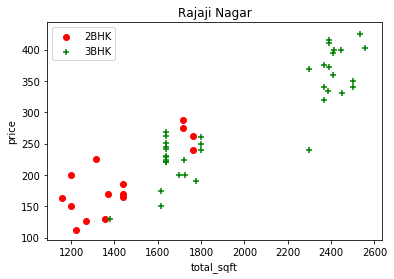

In [70]:
def plot_scatter_total_sqft_and_price(df,location):
        bhk2 = df[(df.location==location) & (df.bhk==2)]
        bhk3 = df[(df.location==location) & (df.bhk==3)]
        plt.scatter(bhk2.total_sqft, bhk2.price, color ='red', label='2BHK')
        plt.scatter(bhk3.total_sqft, bhk3.price, color='green',  marker = "+", label = '3BHK')
        plt.xlabel("total_sqft")
        plt.ylabel("price")
        plt.title(location)
        plt.legend()
plot_scatter_total_sqft_and_price(df8,"Rajaji Nagar")


In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices)
df9 = remove_bhk_outliers(df8)
# df9 = df78.copy()
df9.shape


(6152, 7)

# After Outlier Removal

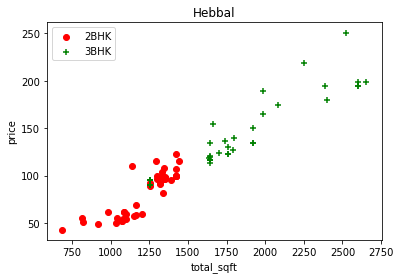

In [72]:
plot_scatter_total_sqft_and_price(df9,"Hebbal") 



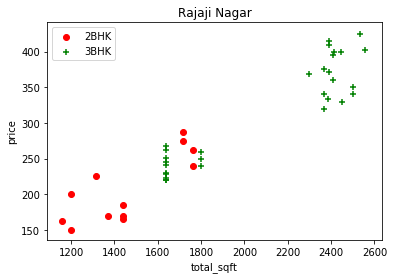

In [73]:
plot_scatter_total_sqft_and_price(df9,"Rajaji Nagar")

Text(0, 0.5, 'count')

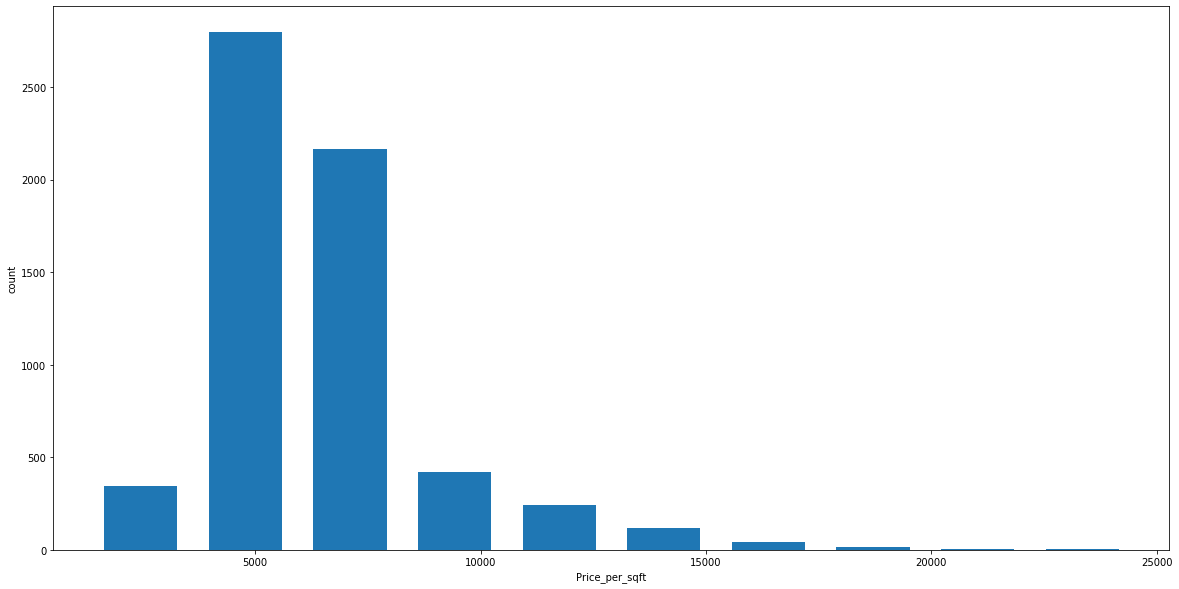

In [74]:
import matplotlib

plt.figure(figsize=(20, 10))

plt.hist(df9.price_per_sqft, rwidth= 0.7)
plt.xlabel("Price_per_sqft")
plt.ylabel("count")


In [75]:
#Outlier Removal Using Bathrooms Feature


In [76]:
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

Text(0, 0.5, 'Count')

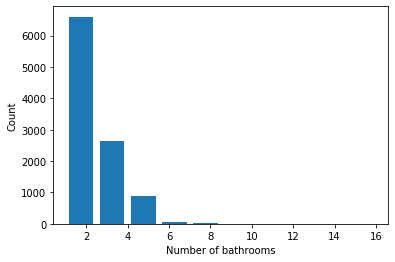

In [77]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [78]:
df9[~(df9.bath>df9.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
...,...,...,...,...,...,...,...
10327,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10328,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10331,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10332,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [79]:
df9.head(2)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [80]:
#the size and price_per_sqft columns can be dropped from the dataframe because they are not of much use.
 
df10 = df9.drop(['size','price_per_sqft'],axis="columns")
df10.head()


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
2,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4


# Model Building 

In [81]:
#we convert the text data to numeric data.

In [82]:
dummies_df=pd.get_dummies(df10['location'])
dummies_df2 = dummies_df.drop('other', axis="columns")


In [83]:
df11= pd.concat([df10, dummies_df2], axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#now 'location' column can be dropped
df12=df11.drop('location', axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df12.shape

(6152, 245)

In [86]:
#here the dependent variable is price
#So, price can be dropped.

In [87]:
y=df12['price']
y.head()

0    428.0
2    235.0
4    148.0
5    413.0
6    368.0
Name: price, dtype: float64

In [88]:
X= df12.drop('price', axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [90]:
from sklearn.linear_model import LinearRegression
lr_model1=LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lr_model1.score(X_test,y_test)

0.8364405040366203

In [92]:
#cross validation is used to measure model performance. This idea is good because we are giving variety of samples to our model and taking average of all the scores.

In [93]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
results=cross_val_score(LinearRegression(), X,y,cv=cv)


In [94]:
print(results)

[0.82628327 0.79257703 0.87215923 0.84882794 0.80342221]


In [95]:
print(results.mean())

0.8286539357378878


In [96]:
#GridSearchCV is a very good API that sklearn provides. It runs the model on different algorithms and selects the best regression algorithm.

In [97]:
from sklearn.model_selection import GridSearchCV



In [98]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [103]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.828654,{'normalize': True}
1,lasso,0.691872,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.716030,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [104]:
#in the above output, Linear Regression gives the maximum accuracy.

In [105]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10327,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10328,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10331,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10332,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [159]:
np.where(X.columns=='Yeshwanthpur')[0]

array([243], dtype=int64)

In [192]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
       
    return lr_model1.predict([x])[0]

In [201]:
predict_price('Yeshwanthpur',1000, 2, 2)


68.95509013519852

In [202]:
predict_price('Rajaji Nagar',1000, 2, 1)


224.98955451004377

In [210]:
#Export the tested model to a pickle file

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_model1,f)


In [220]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
           }
with open("columns.json","w") as f:
      json.dump(columns,f)